# NOAA UFS Replay on Google Cloud Storage (GCS)

In [1]:
import xarray as xr

## 1/4 Degree

There's currently 1 year (1994) of 1/4 degree data at 3 hour frequency on GCS

In [2]:
ds = xr.open_zarr(
    "gcs://noaa-ufs-gefsv13replay/ufs-hr1/0.25-degree/03h-freq/zarr-1year/fv3.zarr",
    storage_options={"token": "anon"},
)

In [4]:
print(ds.data_vars)

Data variables:
    clwmr       (time, pfull, grid_yt, grid_xt) float32 dask.array<chunksize=(1, 127, 768, 1536), meta=np.ndarray>
    dpres       (time, pfull, grid_yt, grid_xt) float32 dask.array<chunksize=(1, 127, 768, 1536), meta=np.ndarray>
    f10m        (time, grid_yt, grid_xt) float32 dask.array<chunksize=(1, 768, 1536), meta=np.ndarray>
    grle        (time, pfull, grid_yt, grid_xt) float32 dask.array<chunksize=(1, 127, 768, 1536), meta=np.ndarray>
    icec        (time, grid_yt, grid_xt) float32 dask.array<chunksize=(1, 768, 1536), meta=np.ndarray>
    icmr        (time, pfull, grid_yt, grid_xt) float32 dask.array<chunksize=(1, 127, 768, 1536), meta=np.ndarray>
    land        (time, grid_yt, grid_xt) float32 dask.array<chunksize=(1, 768, 1536), meta=np.ndarray>
    nicp        (time, pfull, grid_yt, grid_xt) float32 dask.array<chunksize=(1, 127, 768, 1536), meta=np.ndarray>
    ntrnc       (time, pfull, grid_yt, grid_xt) float32 dask.array<chunksize=(1, 127, 768, 1536), me

In [5]:
# 3D variables ~600 MB
ds.tmp.encoding["preferred_chunks"]

{'time': 1, 'pfull': 127, 'grid_yt': 768, 'grid_xt': 1536}

In [6]:
# 2D variables ~4 MB
ds.tmp2m.encoding["preferred_chunks"]

{'time': 1, 'grid_yt': 768, 'grid_xt': 1536}

CPU times: user 3.95 s, sys: 304 ms, total: 4.25 s
Wall time: 2.98 s


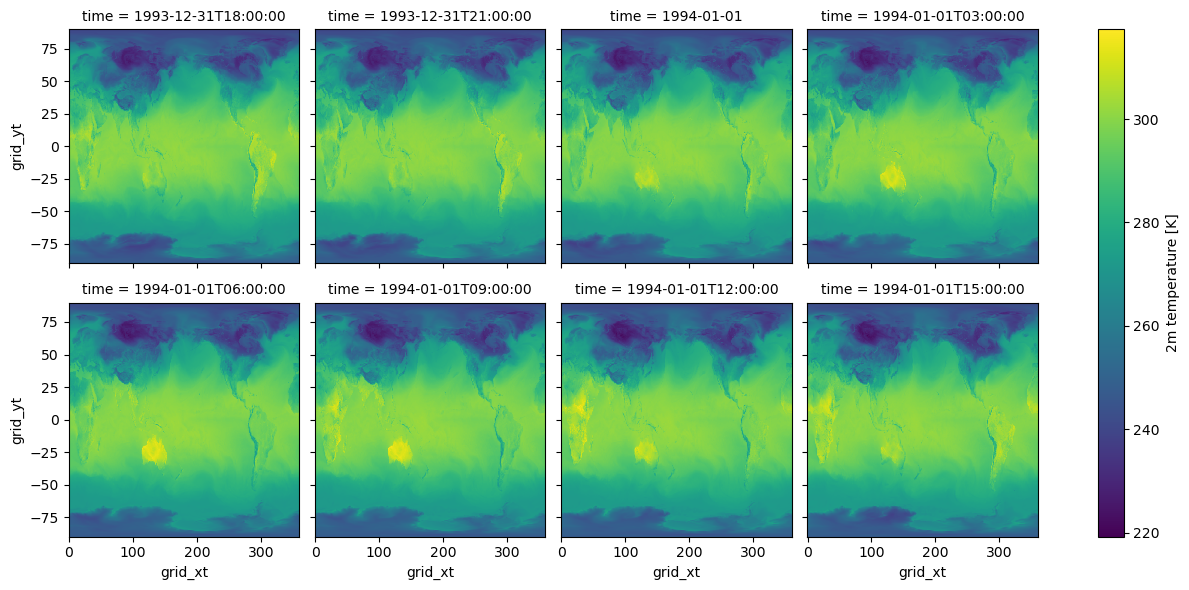

In [7]:
%%time
ds.tmp2m.isel(time=slice(8)).plot(col="time", col_wrap=4)

## 1 Degree

There's currently 5.5 years of 1 degree data at 3 hour frequency on GCS

In [8]:
ds1 = xr.open_zarr(
    "gcs://noaa-ufs-gefsv13replay/ufs-hr1/1.00-degree/03h-freq/zarr/fv3.zarr",
    storage_options={"token": "anon"},
)

In [9]:
ds1.data_vars

Data variables:
    clwmr       (time, pfull, grid_yt, grid_xt) float32 dask.array<chunksize=(1, 127, 192, 384), meta=np.ndarray>
    dpres       (time, pfull, grid_yt, grid_xt) float32 dask.array<chunksize=(1, 127, 192, 384), meta=np.ndarray>
    f10m        (time, grid_yt, grid_xt) float32 dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    grle        (time, pfull, grid_yt, grid_xt) float32 dask.array<chunksize=(1, 127, 192, 384), meta=np.ndarray>
    icec        (time, grid_yt, grid_xt) float32 dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    icmr        (time, pfull, grid_yt, grid_xt) float32 dask.array<chunksize=(1, 127, 192, 384), meta=np.ndarray>
    land        (time, grid_yt, grid_xt) float32 dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    nicp        (time, pfull, grid_yt, grid_xt) float32 dask.array<chunksize=(1, 127, 192, 384), meta=np.ndarray>
    ntrnc       (time, pfull, grid_yt, grid_xt) float32 dask.array<chunksize=(1, 127, 192, 384), meta=np.nda

Chunksizes are as follows

In [10]:
# 3D variables ~37 MB
ds1.tmp.encoding["preferred_chunks"]

{'time': 1, 'pfull': 127, 'grid_yt': 192, 'grid_xt': 384}

In [11]:
# 2D variables ~0.29 MB
ds1.tmp2m.encoding["preferred_chunks"]

{'time': 1, 'grid_yt': 192, 'grid_xt': 384}

CPU times: user 2.4 s, sys: 64.5 ms, total: 2.47 s
Wall time: 611 ms


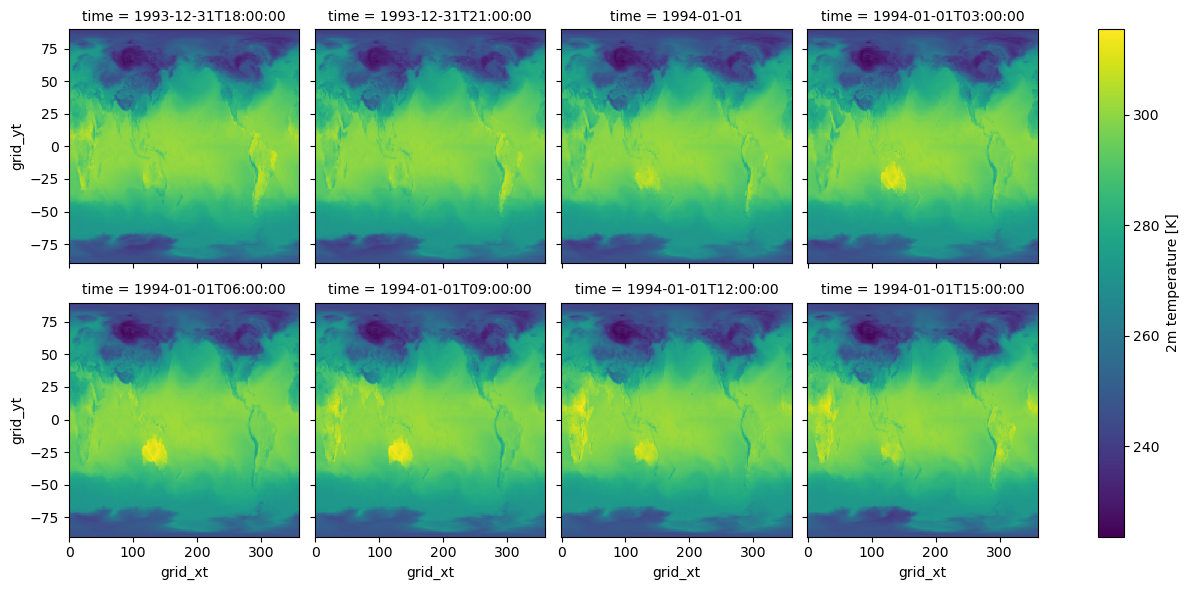

In [12]:
%%time
ds1.tmp2m.isel(time=slice(8)).plot(col="time", col_wrap=4)